In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("TaxiFare.csv")

In [6]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [17]:
df.shape

(50000, 8)

In [7]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [9]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [10]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [11]:
df["amount"].describe()

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [12]:
index_names = df[df["amount"]<2.5].index

In [13]:
index_names

Int64Index([2039, 2486, 2780, 10002, 13032, 27891, 28839, 36722, 42337, 47302], dtype='int64')

In [14]:
df.drop(index_names,inplace=True)

In [15]:
df.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,49990.0,11.366813,9.684697,2.500000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.566400,46.500000,52.000000,200.000000
longitude_of_pickup,49990.0,-72.509468,10.394880,-75.423848,-74.014436,-74.010456,-74.008734,-74.007742,-74.006816,-74.002780,-73.992062,-73.985837,-73.981840,-73.967155,-73.950996,-73.871348,-73.862870,-73.137393,0.000000,40.783472
latitude_of_pickup,49990.0,39.933598,6.225469,-74.006893,0.000000,40.578523,40.645443,40.681107,40.702132,40.717985,40.734883,40.746855,40.752679,40.767360,40.779778,40.787795,40.790614,40.799604,40.807129,401.083332
longitude_of_dropoff,49990.0,-72.505803,10.403539,-84.654241,-74.015120,-74.011755,-74.009840,-74.008284,-74.007275,-74.002710,-73.991152,-73.984217,-73.980082,-73.963588,-73.944750,-73.873280,-73.864201,-73.434436,0.000000,40.851027
latitude_of_dropoff,49990.0,39.926903,6.012677,-74.006377,0.000000,40.569767,40.646891,40.672764,40.686076,40.713277,40.734375,40.747609,40.753373,40.768166,40.782897,40.794074,40.798798,40.810249,40.832503,43.415190
no_of_passenger,49990.0,1.667914,1.289250,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000


In [20]:
df["X1"] = df["latitude_of_pickup"]
df["X2"] = df["latitude_of_dropoff"]
df["Y1"] = df["longitude_of_pickup"]
df["Y2"] = df["longitude_of_dropoff"]

In [21]:
df["Distance_Travel"] = np.sqrt((np.square(df["X1"]-df["X2"]))+(np.square(df["Y1"]-df["Y2"])))

In [22]:
df1=df.drop(columns=["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"])

In [23]:
df1[["date","Time","Zone"]]=df1["date_time_of_pickup"].str.split(pat=" ",n=-1 , expand=True)

In [24]:
df2 = df1.copy()

In [25]:
df2["amount"] = np.where(df2["amount"]>=52, 52, df2["amount"])
df2["no_of_passenger"] = np.where(df2["no_of_passenger"]>=5, 4, df2["no_of_passenger"])
df2["Distance_Travel"] = np.where(df2["Distance_Travel"]>=0.228218, 0.228218, df2["Distance_Travel"])

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_id            49990 non-null  object 
 1   amount               49990 non-null  float64
 2   date_time_of_pickup  49990 non-null  object 
 3   no_of_passenger      49990 non-null  int64  
 4   X1                   49990 non-null  float64
 5   X2                   49990 non-null  float64
 6   Y1                   49990 non-null  float64
 7   Y2                   49990 non-null  float64
 8   Distance_Travel      49990 non-null  float64
 9   date                 49990 non-null  object 
 10  Time                 49990 non-null  object 
 11  Zone                 49990 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 5.0+ MB


In [29]:
df2["date"] = pd.to_datetime(df2["date"])
df2["date_time_of_pickup"] = pd.to_datetime(df2["date_time_of_pickup"])

In [31]:
df2["hours"] = df2["date_time_of_pickup"].dt.hour
df2["min"] = df2["date_time_of_pickup"].dt.minute
df2["second"] = df2["date_time_of_pickup"].dt.second
df2["year"] = df2["date_time_of_pickup"].dt.year
df2["day_of_the_month"] = df2["date_time_of_pickup"].dt.day

In [32]:
def time_of_day(x):
    if x in range(6,12):
        return "Morning"
    elif x in range(12,17):
        return "Afternoon"
    elif x in range(17,21):
        return "Evening"
    else:
        return "Night"

In [33]:
df2["time_of_day"] = df2["hours"].apply(time_of_day)

In [34]:
df2["day"] = df2["date_time_of_pickup"].dt.day_name()
df2["day_no"] = df2["date_time_of_pickup"].dt.weekday

In [37]:
df2 = df2.loc[df2['X1'].between(40, 42)]
df2 = df2.loc[df2['Y1'].between(-75, -72)]
df2 = df2.loc[df2['X2'].between(40, 42)]
df2 = df2.loc[df2['Y2'].between(-75, -72)]
print(f'New number of observations: {df2.shape[0]}')

New number of observations: 48944


In [38]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [40]:
df2['manhattan_d'] = minkowski_distance(df2['Y1'], 
                                       df2['Y2'],
                                       df2['X1'],
                                       df2['X2'], 1)

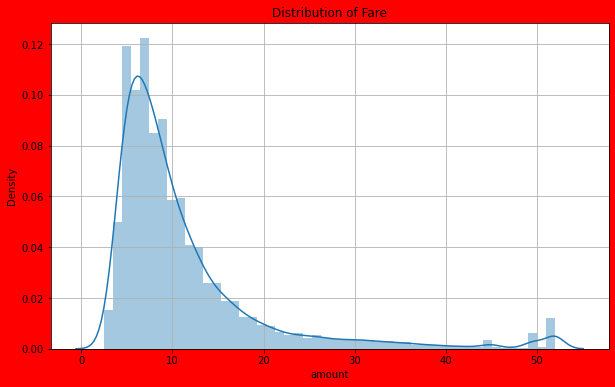

In [42]:
plt.figure(figsize = (10, 6),facecolor="RED")
sns.distplot(df2['amount']);
plt.title('Distribution of Fare')
plt.grid()
plt.savefig('Distribution of Fare.jpg')

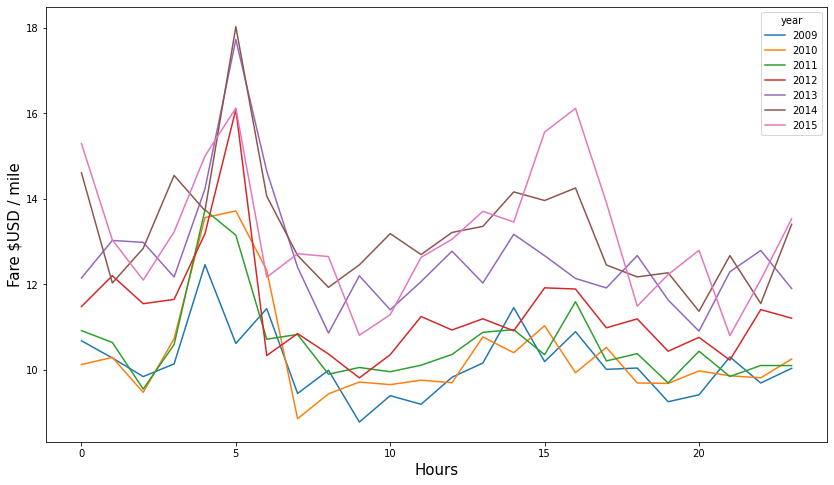

In [44]:
df2.pivot_table(index='hours', columns='year', values="amount",aggfunc="mean").plot(figsize=(14,8))
plt.xlabel("Hours",fontsize=(15))
plt.ylabel('Fare $USD / mile',fontsize=(15))
plt.savefig('Fare $USD_mile.jpg')

In [46]:
df2.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,...,Zone,hours,min,second,year,day_of_the_month,time_of_day,day,day_no,manhattan_d
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,...,UTC,17,26,21,2009,15,Evening,Monday,0,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,...,UTC,16,52,16,2010,5,Afternoon,Tuesday,1,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,...,UTC,0,35,0,2011,18,Night,Thursday,3,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,...,UTC,4,30,42,2012,21,Night,Saturday,5,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,...,UTC,7,51,0,2010,9,Morning,Tuesday,1,0.027194


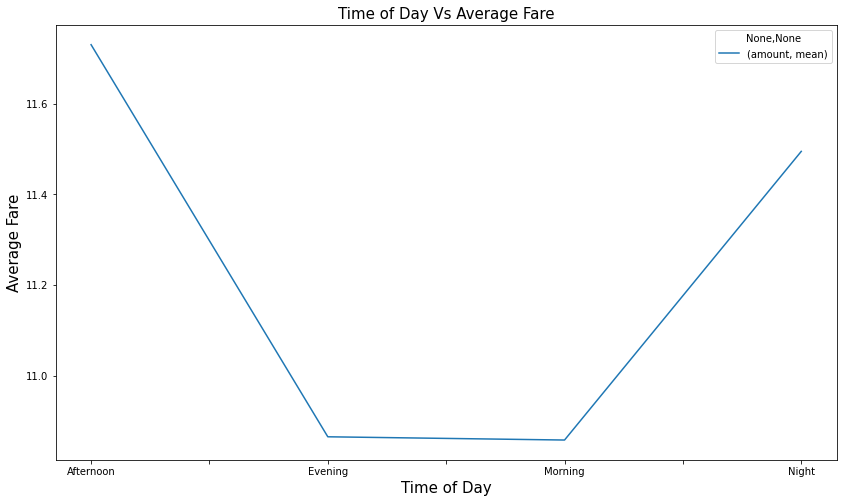

In [49]:
df2.groupby(df2["time_of_day"]).agg({"amount":["mean"]}).plot(figsize=(14,8))
plt.title("Time of Day Vs Average Fare",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))
plt.savefig("Time_of_Day_vs_Average_Fare.jpg")

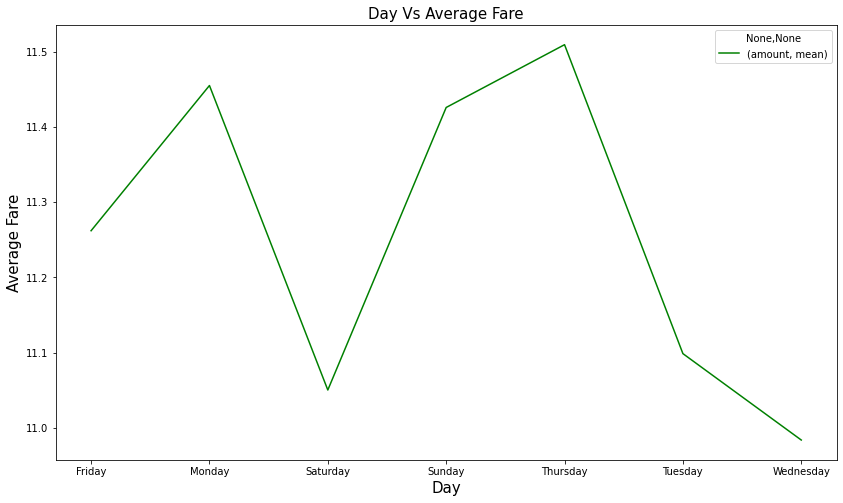

In [51]:
df2.groupby(df2["day"]).agg({"amount":["mean"]}).plot(figsize=(14,8),color="GREEN")
plt.title("Day Vs Average Fare",fontsize=(15))
plt.xlabel("Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))
plt.savefig("Day_vs_Average_Fare.jpg")

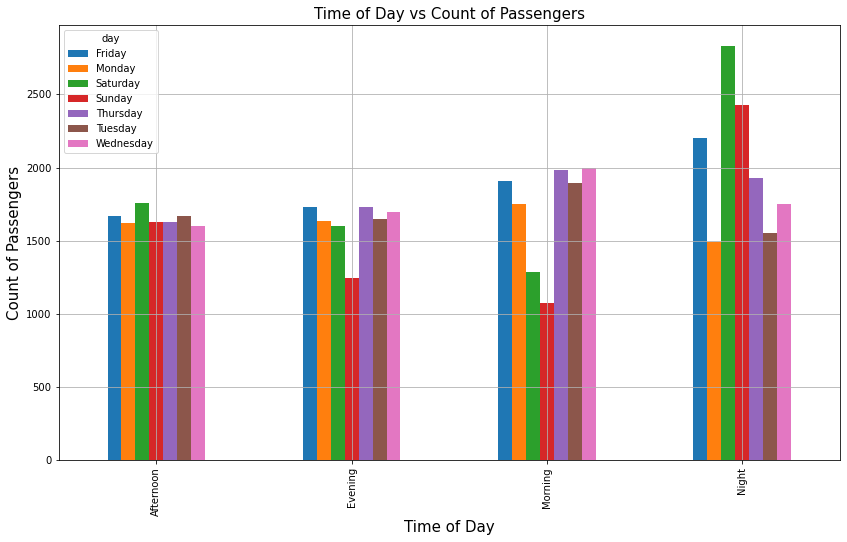

In [52]:
df2.pivot_table(index='time_of_day', columns='day', values="no_of_passenger",aggfunc="count").plot(figsize=(14,8),kind='bar')
plt.title("Time of Day vs Count of Passengers",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Count of Passengers',fontsize=(15));
plt.grid()
plt.savefig("Time_of_Day_vs_Count_of_Passengers.jpg")

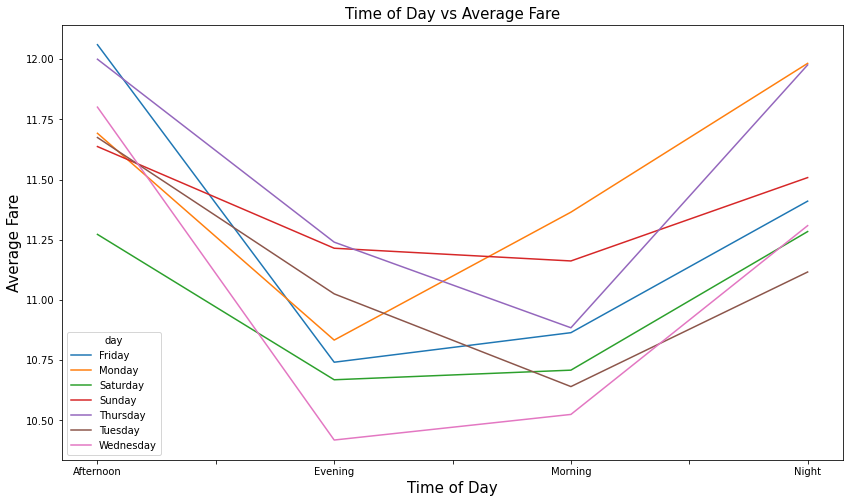

In [53]:
df2.pivot_table(index='time_of_day', columns='day', values="amount",aggfunc="mean").plot(figsize=(14,8))
plt.title("Time of Day vs Average Fare",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))
plt.savefig("Time_of_Day_vs_Average_Fare.jpg")

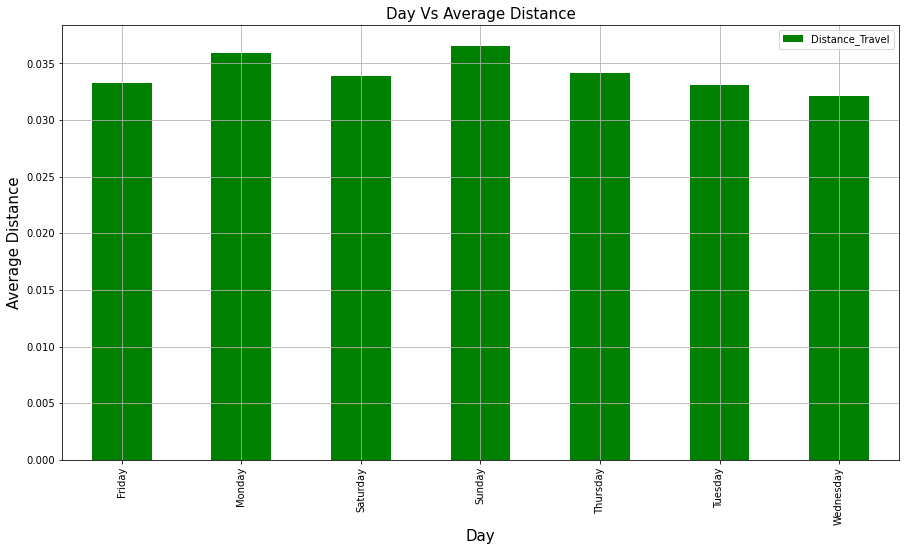

In [54]:
df2.pivot_table(index="day",values= "Distance_Travel",aggfunc="mean").plot(figsize=(15,8),kind='bar',color='Green')
plt.title("Day Vs Average Distance",fontsize=(15))
plt.xlabel("Day",fontsize=(15))
plt.ylabel('Average Distance',fontsize=(15));
plt.grid()
plt.savefig("Day Vs Average Distance.jpg")

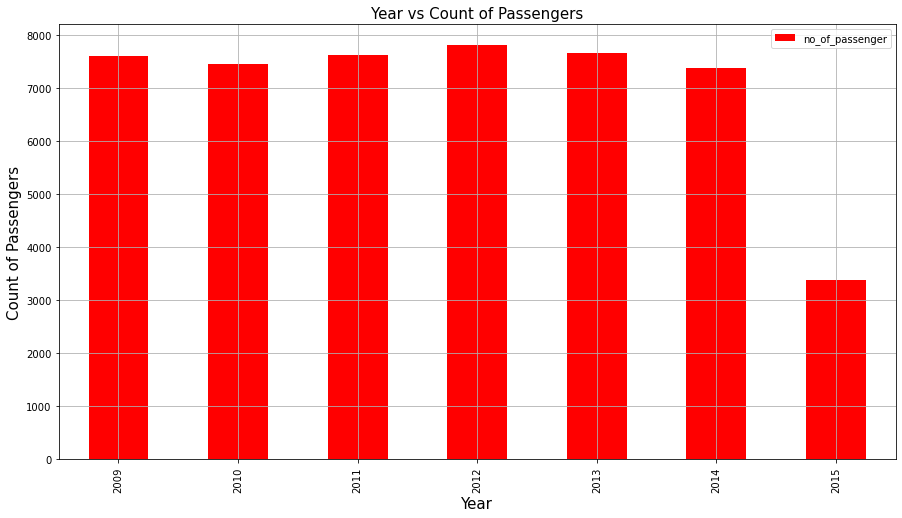

In [55]:
df2.pivot_table(index="year",values= "no_of_passenger",aggfunc="count").plot(figsize=(15,8), kind='bar',color='red')
plt.title("Year vs Count of Passengers",fontsize=(15))
plt.xlabel("Year",fontsize=(15))
plt.ylabel('Count of Passengers',fontsize=(15));
plt.grid()
plt.savefig("Year vs Count of Passengers.jpg")

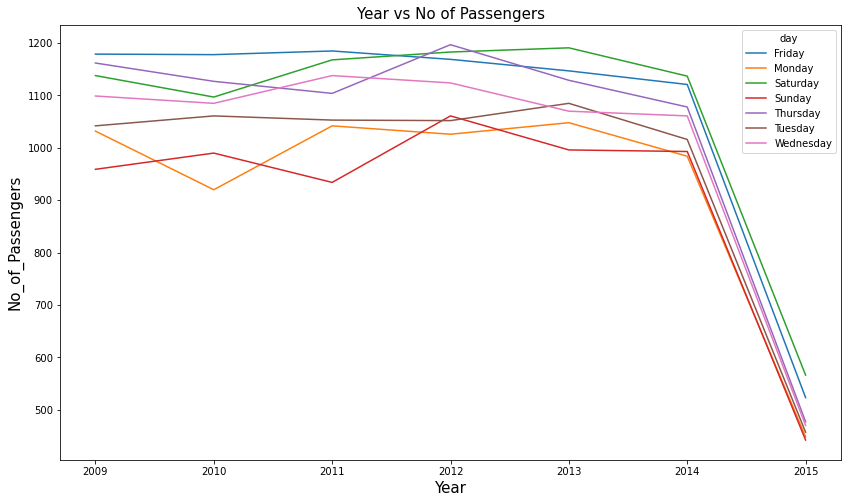

In [56]:
df2.pivot_table(index="year",columns="day",values="no_of_passenger",aggfunc="count").plot(figsize=(14,8))
plt.title("Year vs No of Passengers",fontsize=(15))
plt.xlabel("Year",fontsize=(15))
plt.ylabel('No_of_Passengers',fontsize=(15))
plt.savefig("Year vs No of Passengers.jpg")

In [57]:
df2.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   unique_id    48944 non-null  object
 1   Time         48944 non-null  object
 2   Zone         48944 non-null  object
 3   time_of_day  48944 non-null  object
 4   day          48944 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


In [58]:
df2.drop(columns=["unique_id","Time","Zone","date","min","second","date_time_of_pickup","X1","X2","Y1","Y2"],inplace =True)

In [59]:
df3 = pd.get_dummies(df2,columns=["time_of_day","day"])

In [60]:
df3["Is_Weekend"] =np.where(df3["day_no"].isin ([0,6]),1,0)
df3["Is_starting_of_month"] = np.where(df3["day_of_the_month"].isin ([1,2,3,4,5,6,7,8,9,10]),1,0)
df3["Is_middle_of_month"] = np.where(df3["day_of_the_month"].isin (range(11,21)),1,0)
df3["Is_end_of_month"] = np.where(df3["day_of_the_month"].isin (range(21,32)),1,0)
df3["Is_leap_year"] = np.where((df3["year"]%4 == 0),1,0)

In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount                 48944 non-null  float64
 1   no_of_passenger        48944 non-null  int64  
 2   Distance_Travel        48944 non-null  float64
 3   hours                  48944 non-null  int64  
 4   year                   48944 non-null  int64  
 5   day_of_the_month       48944 non-null  int64  
 6   day_no                 48944 non-null  int64  
 7   manhattan_d            48944 non-null  float64
 8   time_of_day_Afternoon  48944 non-null  uint8  
 9   time_of_day_Evening    48944 non-null  uint8  
 10  time_of_day_Morning    48944 non-null  uint8  
 11  time_of_day_Night      48944 non-null  uint8  
 12  day_Friday             48944 non-null  uint8  
 13  day_Monday             48944 non-null  uint8  
 14  day_Saturday           48944 non-null  uint8  
 15  da

In [62]:
y = df3["amount"]
X = df3.drop(columns=["amount"])

In [63]:
corr_data=X.corr()
pd.set_option("display.precision", 3)
corr_data.style.background_gradient(cmap="coolwarm")

,no_of_passenger,Distance_Travel,hours,year,day_of_the_month,day_no,manhattan_d,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Is_Weekend,Is_starting_of_month,Is_middle_of_month,Is_end_of_month,Is_leap_year
no_of_passenger,1.000,0.016,0.014,-0.006,0.007,0.048,0.013,-0.006,0.015,-0.050,0.038,0.004,-0.013,0.038,0.031,-0.024,-0.023,-0.014,0.013,-0.006,-0.003,0.009,-0.003
Distance_Travel,0.016,1.000,-0.034,0.026,-0.000,0.008,0.936,-0.005,-0.031,-0.033,0.064,-0.009,0.019,-0.002,0.025,0.001,-0.010,-0.021,0.034,-0.000,0.003,-0.003,0.002
hours,0.014,-0.034,1.000,0.005,-0.007,-0.091,-0.031,0.037,0.426,-0.405,-0.048,0.006,0.029,-0.028,-0.097,0.027,0.036,0.025,-0.052,0.006,-0.001,-0.004,-0.002
year,-0.006,0.026,0.005,1.000,-0.011,0.006,0.017,-0.010,-0.002,0.003,0.008,-0.005,0.003,0.010,0.006,-0.007,-0.001,-0.005,0.006,0.008,0.003,-0.011,0.061
day_of_the_month,0.007,-0.000,-0.007,-0.011,1.000,0.008,0.000,0.010,-0.010,-0.001,0.001,0.005,-0.001,0.009,0.002,-0.008,-0.003,-0.005,0.001,-0.808,-0.015,0.818,-0.004
day_no,0.048,0.008,-0.091,0.006,0.008,1.000,0.006,-0.002,-0.039,-0.090,0.124,0.211,-0.606,0.427,0.587,-0.007,-0.416,-0.216,-0.018,-0.008,0.004,0.003,0.005
manhattan_d,0.013,0.936,-0.031,0.017,0.000,0.006,1.000,-0.005,-0.027,-0.025,0.053,-0.009,0.017,-0.000,0.021,0.000,-0.010,-0.018,0.029,-0.002,0.004,-0.001,-0.000
time_of_day_Afternoon,-0.006,-0.005,0.037,-0.010,0.010,-0.002,-0.005,1.000,-0.305,-0.315,-0.356,-0.014,0.012,-0.002,0.018,-0.012,0.010,-0.009,0.022,-0.004,-0.008,0.012,-0.008
time_of_day_Evening,0.015,-0.031,0.426,-0.002,-0.010,-0.039,-0.027,-0.305,1.000,-0.310,-0.350,-0.000,0.019,-0.016,-0.033,0.007,0.013,0.010,-0.010,0.008,0.002,-0.010,-0.000
time_of_day_Morning,-0.050,-0.033,-0.405,0.003,-0.001,-0.090,-0.025,-0.315,-0.310,1.000,-0.362,0.011,0.024,-0.070,-0.067,0.029,0.034,0.038,-0.033,-0.001,0.006,-0.005,-0.001


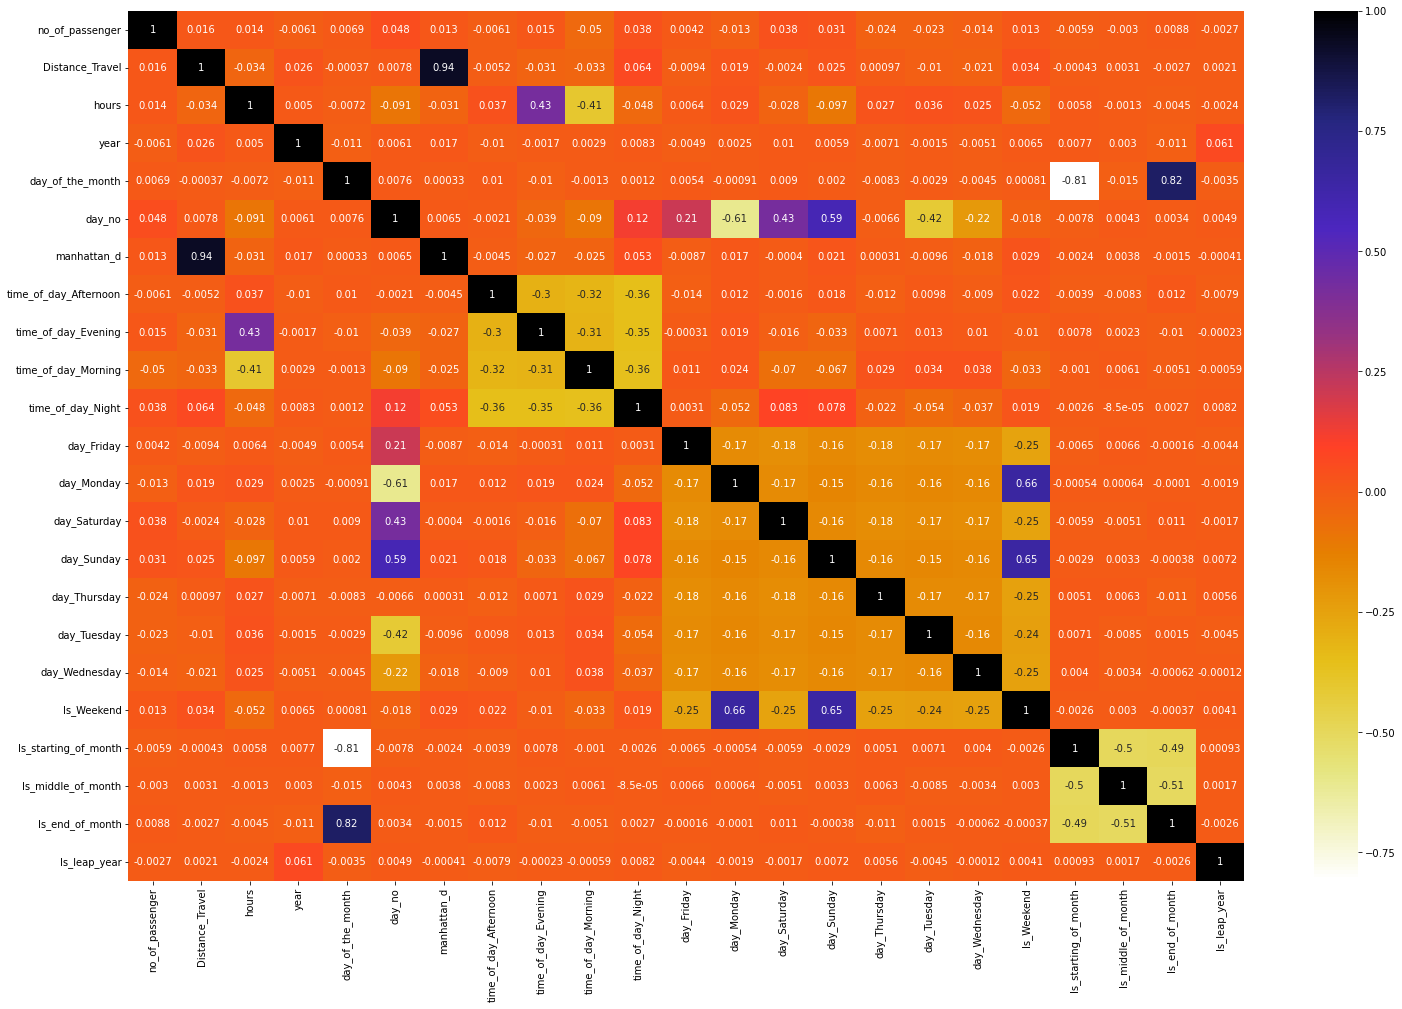

In [64]:
plt.figure(figsize=(25,16))
sns.heatmap(corr_data, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [65]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.2 , random_state = 1)

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39155 entries, 15614 to 33714
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no_of_passenger        39155 non-null  int64  
 1   Distance_Travel        39155 non-null  float64
 2   hours                  39155 non-null  int64  
 3   year                   39155 non-null  int64  
 4   day_of_the_month       39155 non-null  int64  
 5   day_no                 39155 non-null  int64  
 6   manhattan_d            39155 non-null  float64
 7   time_of_day_Afternoon  39155 non-null  uint8  
 8   time_of_day_Evening    39155 non-null  uint8  
 9   time_of_day_Morning    39155 non-null  uint8  
 10  time_of_day_Night      39155 non-null  uint8  
 11  day_Friday             39155 non-null  uint8  
 12  day_Monday             39155 non-null  uint8  
 13  day_Saturday           39155 non-null  uint8  
 14  day_Sunday             39155 non-null  uint8  
 15

In [67]:
xtrain_matrix = X_train.describe().T

In [68]:
xtest_matrix= X_test.describe().T

In [69]:
xtest_matrix.to_excel("X_test.xlsx")
xtrain_matrix.to_excel("X_train.xlsx")

In [80]:
rf2 = RandomForestRegressor(n_estimators=50 ,max_depth = 4,min_samples_split=3,
                min_samples_leaf=3)
rf2.fit(X_train,y_train)
print("Train R2", rf2.score(X_train,y_train))
print("Test R2",rf2.score(X_test,y_test))

Train R2 0.8145745954673105
Test R2 0.8049836114783989


In [81]:
param = {"n_estimators":[20,50] ,"max_depth": [3,5],"min_samples_split":[2,4],
                "min_samples_leaf":[2,4]}

rf3 = RandomForestRegressor()
Grid_search = GridSearchCV(estimator = rf3, param_grid=param,cv=5,verbose=1,n_jobs=-1)
Grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [20, 50]},
             verbose=1)

In [82]:
print("Train R2", Grid_search.score(X_train,y_train))
print("Test R2",Grid_search.score(X_test,y_test))

Train R2 0.8285843469446503
Test R2 0.8211163434514991


In [83]:
print("MAE of Train: ", np.mean(np.abs((y_train-Grid_search.predict(X_train))) ))
print("MAE of Test: ", np.mean(np.abs((y_test-Grid_search.predict(X_test))) ))
print("RMSE of Train: ", np.sqrt(np.mean((y_train-Grid_search.predict(X_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-Grid_search.predict(X_test))**2) ))

MAE of Train:  2.072699919039003
MAE of Test:  2.1078709951330548
RMSE of Train:  3.71172185835887
RMSE of Test:  3.7749999732830974
